In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay 

In [4]:
df=pd.read_csv('travel_dataset (1).csv')
df

,CustomerID,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,MonthlyIncome,Occupation,PreferredPropertyStar,OwnCar,...,TypeofContact,NumberOfPersonVisiting,ProductPitched,Age,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,ProductTaken,NumberOfChildrenVisiting
0,200000,Yes,1.0,Tier 3 City,3.0,6.0,20993.0,Salaried,3.0,Yes,...,Self Enquiry,3,Deluxe,41.0,Single,Mobile,Female,2,Yes,0.0
1,200001,No,2.0,Tier 1 City,4.0,14.0,20130.0,Salaried,4.0,Yes,...,Company Invited,3,Deluxe,49.0,Divorced,Desktop,Male,3,No,2.0
2,200002,Yes,7.0,Tier 1 City,4.0,8.0,17090.0,Free Lancer,3.0,No,...,Self Enquiry,3,Basic,37.0,Single,Desktop,Male,3,Yes,0.0
3,200003,Yes,2.0,Tier 1 City,3.0,9.0,17909.0,Salaried,3.0,Yes,...,Company Invited,2,Basic,33.0,Divorced,Desktop,Female,5,No,1.0
4,200004,No,1.0,Tier 1 City,3.0,8.0,18468.0,Small Business,4.0,Yes,...,Self Enquiry,2,Basic,NaN,Divorced,Desktop,Male,5,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,Yes,2.0,Tier 3 City,5.0,9.0,26576.0,Small Business,4.0,Yes,...,Self Enquiry,3,Deluxe,49.0,Unmarried,Mobile,Male,1,Yes,1.0
4884,204884,Yes,3.0,Tier 1 City,5.0,31.0,21212.0,Salaried,3.0,Yes,...,Company Invited,4,Basic,28.0,Single,Desktop,Male,3,Yes,2.0
4885,204885,No,7.0,Tier 3 City,4.0,17.0,31820.0,Salaried,4.0,Yes,...,Self Enquiry,4,Standard,52.0,Married,Mobile,Female,1,Yes,3.0
4886,204886,No,3.0,Tier 3 City,4.0,16.0,20289.0,Small Business,3.0,No,...,Self Enquiry,3,Basic,19.0,Single,Mobile,Male,5,Yes,2.0


In [5]:
df.head()

,CustomerID,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,MonthlyIncome,Occupation,PreferredPropertyStar,OwnCar,...,TypeofContact,NumberOfPersonVisiting,ProductPitched,Age,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,ProductTaken,NumberOfChildrenVisiting
0,200000,Yes,1.0,Tier 3 City,3.0,6.0,20993.0,Salaried,3.0,Yes,...,Self Enquiry,3,Deluxe,41.0,Single,Mobile,Female,2,Yes,0.0
1,200001,No,2.0,Tier 1 City,4.0,14.0,20130.0,Salaried,4.0,Yes,...,Company Invited,3,Deluxe,49.0,Divorced,Desktop,Male,3,No,2.0
2,200002,Yes,7.0,Tier 1 City,4.0,8.0,17090.0,Free Lancer,3.0,No,...,Self Enquiry,3,Basic,37.0,Single,Desktop,Male,3,Yes,0.0
3,200003,Yes,2.0,Tier 1 City,3.0,9.0,17909.0,Salaried,3.0,Yes,...,Company Invited,2,Basic,33.0,Divorced,Desktop,Female,5,No,1.0
4,200004,No,1.0,Tier 1 City,3.0,8.0,18468.0,Small Business,4.0,Yes,...,Self Enquiry,2,Basic,NaN,Divorced,Desktop,Male,5,No,0.0


In [6]:
df.tail()

,CustomerID,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,MonthlyIncome,Occupation,PreferredPropertyStar,OwnCar,...,TypeofContact,NumberOfPersonVisiting,ProductPitched,Age,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,ProductTaken,NumberOfChildrenVisiting
4883,204883,Yes,2.0,Tier 3 City,5.0,9.0,26576.0,Small Business,4.0,Yes,...,Self Enquiry,3,Deluxe,49.0,Unmarried,Mobile,Male,1,Yes,1.0
4884,204884,Yes,3.0,Tier 1 City,5.0,31.0,21212.0,Salaried,3.0,Yes,...,Company Invited,4,Basic,28.0,Single,Desktop,Male,3,Yes,2.0
4885,204885,No,7.0,Tier 3 City,4.0,17.0,31820.0,Salaried,4.0,Yes,...,Self Enquiry,4,Standard,52.0,Married,Mobile,Female,1,Yes,3.0
4886,204886,No,3.0,Tier 3 City,4.0,16.0,20289.0,Small Business,3.0,No,...,Self Enquiry,3,Basic,19.0,Single,Mobile,Male,5,Yes,2.0
4887,204887,Yes,3.0,Tier 1 City,4.0,14.0,24041.0,Salaried,4.0,Yes,...,Self Enquiry,4,Basic,36.0,Unmarried,Desktop,Male,3,Yes,2.0


In [7]:
df.shape

(4888, 21)

In [8]:
df.columns

Index(['CustomerID', 'Passport', 'NumberOfTrips', 'CityTier',
       'NumberOfFollowups', 'DurationOfPitch', 'MonthlyIncome', 'Occupation',
       'PreferredPropertyStar', 'OwnCar', 'Designation', 'TypeofContact',
       'NumberOfPersonVisiting', 'ProductPitched', 'Age', 'MaritalStatus',
       'DeviceUsed', 'Gender', 'PitchSatisfactionScore', 'ProductTaken',
       'NumberOfChildrenVisiting'],
      dtype='object')

In [9]:
df.dtypes

CustomerID                    int64
Passport                     object
NumberOfTrips               float64
CityTier                     object
NumberOfFollowups           float64
DurationOfPitch             float64
MonthlyIncome               float64
Occupation                   object
PreferredPropertyStar       float64
OwnCar                       object
Designation                  object
TypeofContact                object
NumberOfPersonVisiting        int64
ProductPitched               object
Age                         float64
MaritalStatus                object
DeviceUsed                   object
Gender                       object
PitchSatisfactionScore        int64
ProductTaken                 object
NumberOfChildrenVisiting    float64
dtype: object

In [10]:
df.isna().sum()

CustomerID                    0
Passport                      0
NumberOfTrips               140
CityTier                      0
NumberOfFollowups            45
DurationOfPitch             251
MonthlyIncome               233
Occupation                    0
PreferredPropertyStar        26
OwnCar                        0
Designation                   0
TypeofContact                25
NumberOfPersonVisiting        0
ProductPitched                0
Age                         226
MaritalStatus                 0
DeviceUsed                    0
Gender                      155
PitchSatisfactionScore        0
ProductTaken                  0
NumberOfChildrenVisiting     66
dtype: int64

In [11]:
df['Target']=df['ProductTaken'].map({'Yes':1,"No":0})

In [12]:
df

,CustomerID,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,MonthlyIncome,Occupation,PreferredPropertyStar,OwnCar,...,NumberOfPersonVisiting,ProductPitched,Age,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,ProductTaken,NumberOfChildrenVisiting,Target
0,200000,Yes,1.0,Tier 3 City,3.0,6.0,20993.0,Salaried,3.0,Yes,...,3,Deluxe,41.0,Single,Mobile,Female,2,Yes,0.0,1
1,200001,No,2.0,Tier 1 City,4.0,14.0,20130.0,Salaried,4.0,Yes,...,3,Deluxe,49.0,Divorced,Desktop,Male,3,No,2.0,0
2,200002,Yes,7.0,Tier 1 City,4.0,8.0,17090.0,Free Lancer,3.0,No,...,3,Basic,37.0,Single,Desktop,Male,3,Yes,0.0,1
3,200003,Yes,2.0,Tier 1 City,3.0,9.0,17909.0,Salaried,3.0,Yes,...,2,Basic,33.0,Divorced,Desktop,Female,5,No,1.0,0
4,200004,No,1.0,Tier 1 City,3.0,8.0,18468.0,Small Business,4.0,Yes,...,2,Basic,NaN,Divorced,Desktop,Male,5,No,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,Yes,2.0,Tier 3 City,5.0,9.0,26576.0,Small Business,4.0,Yes,...,3,Deluxe,49.0,Unmarried,Mobile,Male,1,Yes,1.0,1
4884,204884,Yes,3.0,Tier 1 City,5.0,31.0,21212.0,Salaried,3.0,Yes,...,4,Basic,28.0,Single,Desktop,Male,3,Yes,2.0,1
4885,204885,No,7.0,Tier 3 City,4.0,17.0,31820.0,Salaried,4.0,Yes,...,4,Standard,52.0,Married,Mobile,Female,1,Yes,3.0,1
4886,204886,No,3.0,Tier 3 City,4.0,16.0,20289.0,Small Business,3.0,No,...,3,Basic,19.0,Single,Mobile,Male,5,Yes,2.0,1


In [13]:
corr=df.corr(numeric_only=True)
corr

,CustomerID,NumberOfTrips,NumberOfFollowups,DurationOfPitch,MonthlyIncome,PreferredPropertyStar,NumberOfPersonVisiting,Age,PitchSatisfactionScore,NumberOfChildrenVisiting,Target
CustomerID,1.000000,0.224848,0.427539,0.064298,0.276833,0.010553,0.604013,0.032127,-0.035847,0.511763,0.056506
NumberOfTrips,0.224848,1.000000,0.139517,0.009715,0.139105,0.012115,0.195223,0.184905,-0.004378,0.168795,0.018898
NumberOfFollowups,0.427539,0.139517,1.000000,0.009434,0.176503,-0.024176,0.328569,-0.002577,0.004054,0.286425,0.112171
DurationOfPitch,0.064298,0.009715,0.009434,1.000000,-0.006252,-0.006637,0.065141,-0.012063,-0.002880,0.031408,0.078257
MonthlyIncome,0.276833,0.139105,0.176503,-0.006252,1.000000,0.014289,0.195134,0.464869,0.030421,0.201643,-0.130585
PreferredPropertyStar,0.010553,0.012115,-0.024176,-0.006637,0.014289,1.000000,0.033867,-0.010474,-0.022701,0.035798,0.099577
NumberOfPersonVisiting,0.604013,0.195223,0.328569,0.065141,0.195134,0.033867,1.000000,0.011621,-0.019581,0.610621,0.009627
Age,0.032127,0.184905,-0.002577,-0.012063,0.464869,-0.010474,0.011621,1.000000,0.018510,0.007370,-0.147254
PitchSatisfactionScore,-0.035847,-0.004378,0.004054,-0.002880,0.030421,-0.022701,-0.019581,0.018510,1.000000,0.000878,0.051394
NumberOfChildrenVisiting,0.511763,0.168795,0.286425,0.031408,0.201643,0.035798,0.610621,0.007370,0.000878,1.000000,0.007421


<Axes: >

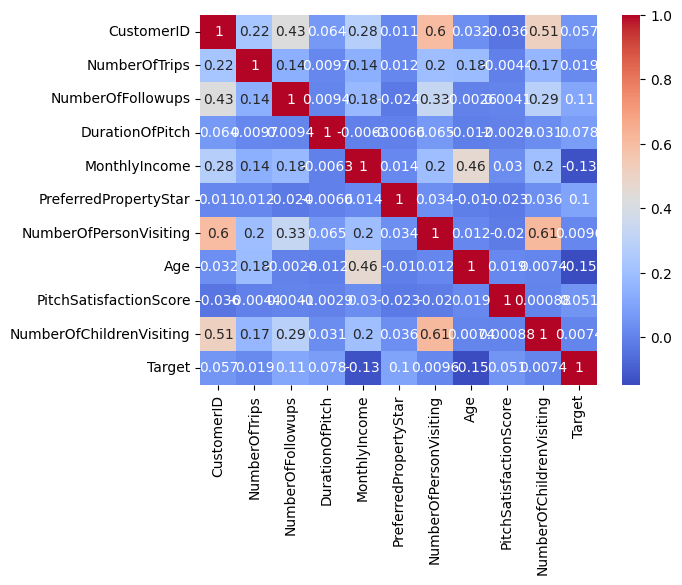

In [14]:
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [15]:
df.drop(['Age'],axis=1,inplace=True)
df.drop(['MonthlyIncome'],axis=1,inplace=True)
df.drop(['CustomerID'],axis=1,inplace=True)
df.drop(['ProductTaken'],axis=1,inplace=True)

In [16]:
df

,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,Occupation,PreferredPropertyStar,OwnCar,Designation,TypeofContact,NumberOfPersonVisiting,ProductPitched,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,NumberOfChildrenVisiting,Target
0,Yes,1.0,Tier 3 City,3.0,6.0,Salaried,3.0,Yes,Manager,Self Enquiry,3,Deluxe,Single,Mobile,Female,2,0.0,1
1,No,2.0,Tier 1 City,4.0,14.0,Salaried,4.0,Yes,Manager,Company Invited,3,Deluxe,Divorced,Desktop,Male,3,2.0,0
2,Yes,7.0,Tier 1 City,4.0,8.0,Free Lancer,3.0,No,Executive,Self Enquiry,3,Basic,Single,Desktop,Male,3,0.0,1
3,Yes,2.0,Tier 1 City,3.0,9.0,Salaried,3.0,Yes,Executive,Company Invited,2,Basic,Divorced,Desktop,Female,5,1.0,0
4,No,1.0,Tier 1 City,3.0,8.0,Small Business,4.0,Yes,Executive,Self Enquiry,2,Basic,Divorced,Desktop,Male,5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Yes,2.0,Tier 3 City,5.0,9.0,Small Business,4.0,Yes,Manager,Self Enquiry,3,Deluxe,Unmarried,Mobile,Male,1,1.0,1
4884,Yes,3.0,Tier 1 City,5.0,31.0,Salaried,3.0,Yes,Executive,Company Invited,4,Basic,Single,Desktop,Male,3,2.0,1
4885,No,7.0,Tier 3 City,4.0,17.0,Salaried,4.0,Yes,Senior Manager,Self Enquiry,4,Standard,Married,Mobile,Female,1,3.0,1
4886,No,3.0,Tier 3 City,4.0,16.0,Small Business,3.0,No,Executive,Self Enquiry,3,Basic,Single,Mobile,Male,5,2.0,1


In [17]:
df.isna().sum()

Passport                      0
NumberOfTrips               140
CityTier                      0
NumberOfFollowups            45
DurationOfPitch             251
Occupation                    0
PreferredPropertyStar        26
OwnCar                        0
Designation                   0
TypeofContact                25
NumberOfPersonVisiting        0
ProductPitched                0
MaritalStatus                 0
DeviceUsed                    0
Gender                      155
PitchSatisfactionScore        0
NumberOfChildrenVisiting     66
Target                        0
dtype: int64

In [18]:
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0],inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mode()[0],inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)

/var/folders/1m/z36b15zj39j4kjp11c4r3cp80000gn/T/ipykernel_1368/772624223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0],inplace=True)
/var/folders/1m/z36b15zj39j4kjp11c4r3cp80000gn/T/ipykernel_1368/772624223.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [19]:
df.isna().sum()

Passport                    0
NumberOfTrips               0
CityTier                    0
NumberOfFollowups           0
DurationOfPitch             0
Occupation                  0
PreferredPropertyStar       0
OwnCar                      0
Designation                 0
TypeofContact               0
NumberOfPersonVisiting      0
ProductPitched              0
MaritalStatus               0
DeviceUsed                  0
Gender                      0
PitchSatisfactionScore      0
NumberOfChildrenVisiting    0
Target                      0
dtype: int64

In [20]:
df.dtypes

Passport                     object
NumberOfTrips               float64
CityTier                     object
NumberOfFollowups           float64
DurationOfPitch             float64
Occupation                   object
PreferredPropertyStar       float64
OwnCar                       object
Designation                  object
TypeofContact                object
NumberOfPersonVisiting        int64
ProductPitched               object
MaritalStatus                object
DeviceUsed                   object
Gender                       object
PitchSatisfactionScore        int64
NumberOfChildrenVisiting    float64
Target                        int64
dtype: object

In [21]:
lab=LabelEncoder()
df['Passport']=lab.fit_transform(df['Passport'])
df['CityTier']=lab.fit_transform(df['CityTier'])
df['Occupation']=lab.fit_transform(df['Occupation'])
df['OwnCar']=lab.fit_transform(df['OwnCar'])
df['Designation']=lab.fit_transform(df['Designation'])
df['TypeofContact']=lab.fit_transform(df['TypeofContact'])
df['ProductPitched']=lab.fit_transform(df['ProductPitched'])
df['MaritalStatus']=lab.fit_transform(df['MaritalStatus'])
df['DeviceUsed']=lab.fit_transform(df['DeviceUsed'])
df['Gender']=lab.fit_transform(df['Gender'])

In [22]:
corr=df.corr()
corr

,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,Occupation,PreferredPropertyStar,OwnCar,Designation,TypeofContact,NumberOfPersonVisiting,ProductPitched,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,NumberOfChildrenVisiting,Target
Passport,1.000000,0.013517,0.001793,0.004411,0.035254,0.003653,0.001221,-0.022330,-0.028513,0.000804,0.011177,-0.013152,-0.007222,0.000022,-0.039524,0.002926,0.020244,0.260844
NumberOfTrips,0.013517,1.000000,-0.026066,0.127746,0.022792,-0.035661,0.009782,-0.014195,0.002585,0.010168,0.179055,0.039393,-0.002454,-0.030571,0.012791,-0.005295,0.149155,0.023684
CityTier,0.001793,-0.026066,1.000000,0.024333,0.015197,0.131834,-0.008479,0.003817,0.120852,-0.009645,-0.001671,0.141485,0.035707,0.978467,-0.000563,-0.042160,0.000578,0.086852
NumberOfFollowups,0.004411,0.127746,0.024333,1.000000,0.026178,-0.015657,-0.026989,0.012186,0.047466,-0.016214,0.324895,0.004725,0.077578,0.021309,0.010230,0.004405,0.281583,0.111560
DurationOfPitch,0.035254,0.022792,0.015197,0.026178,1.000000,0.046930,-0.004635,-0.003937,-0.030936,-0.024595,0.088100,0.036641,-0.003852,0.014111,0.011374,-0.002120,0.049886,0.076089
Occupation,0.003653,-0.035661,0.131834,-0.015657,0.046930,1.000000,0.024131,-0.036508,0.027437,0.003434,0.003221,0.034749,-0.021764,0.113797,0.001241,-0.053928,0.003750,-0.041042
PreferredPropertyStar,0.001221,0.009782,-0.008479,-0.026989,-0.004635,0.024131,1.000000,0.013577,-0.008228,0.031166,0.030519,0.011271,-0.009565,-0.003964,-0.030742,-0.024019,0.031362,0.098704
OwnCar,-0.022330,-0.014195,0.003817,0.012186,-0.003937,-0.036508,0.013577,1.000000,0.032143,0.002970,0.010362,0.070384,-0.021289,0.005967,-0.006040,0.068850,0.025659,-0.011508
Designation,-0.028513,0.002585,0.120852,0.047466,-0.030936,0.027437,-0.008228,0.032143,1.000000,0.004521,-0.005781,0.330022,0.011727,0.113545,0.029444,-0.021908,0.028877,-0.097388
TypeofContact,0.000804,0.010168,-0.009645,-0.016214,-0.024595,0.003434,0.031166,0.002970,0.004521,1.000000,-0.003545,0.001658,-0.034826,-0.004795,-0.013505,-0.018187,-0.007328,-0.049492


<Axes: >

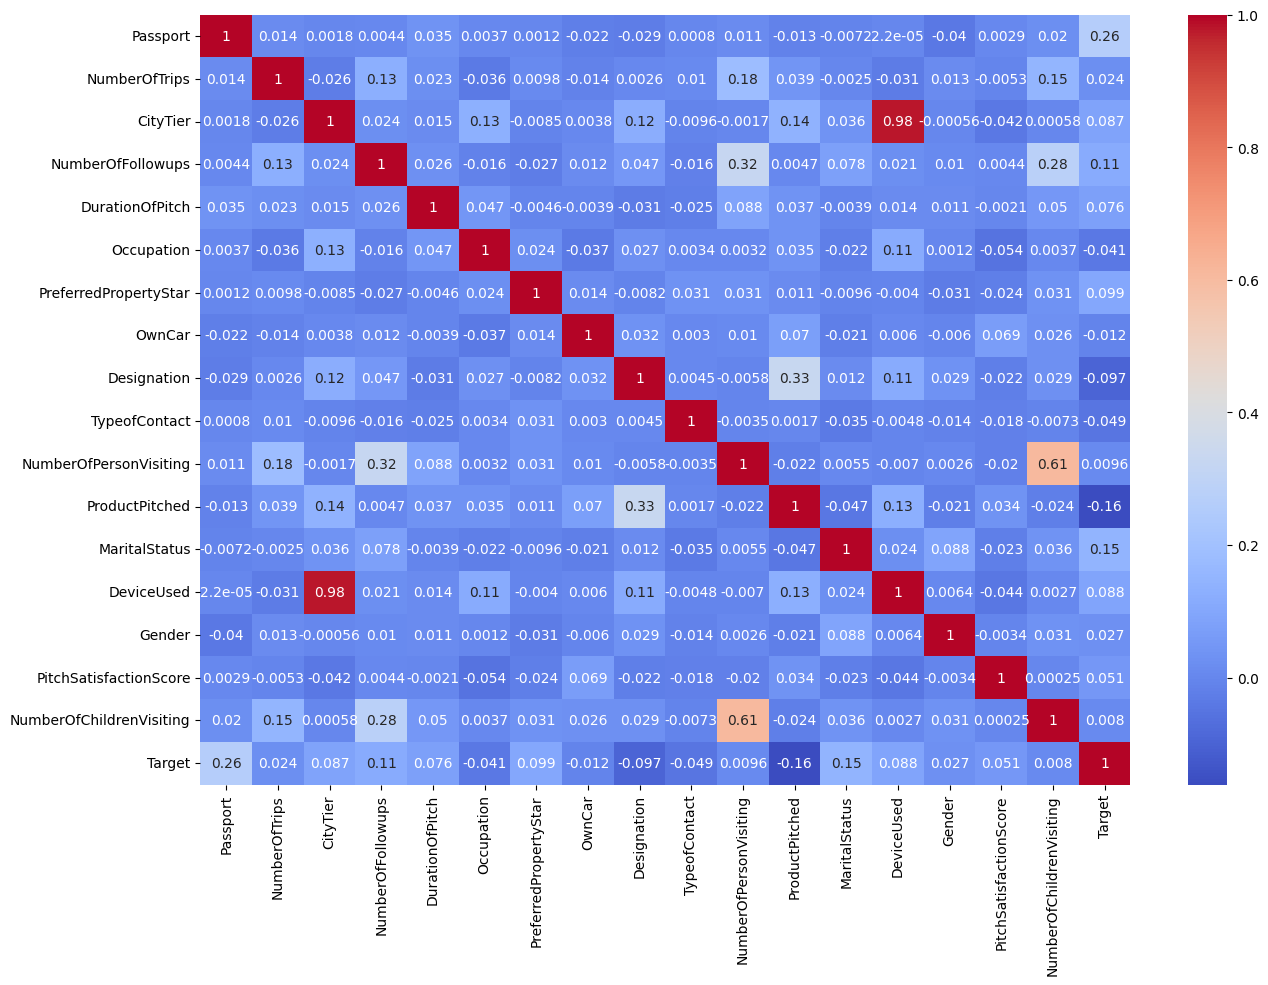

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)


In [24]:
df['Passport'].unique()

array([1, 0])

In [25]:
df['Target'].value_counts()

Target
0    3968
1     920
Name: count, dtype: int64

In [26]:
x=df.drop(['Target'],axis=1).values
x

array([[1., 1., 2., ..., 0., 2., 0.],
       [0., 2., 0., ..., 1., 3., 2.],
       [1., 7., 0., ..., 1., 3., 0.],
       ...,
       [0., 7., 2., ..., 0., 1., 3.],
       [0., 3., 2., ..., 1., 5., 2.],
       [1., 3., 0., ..., 1., 3., 2.]], shape=(4888, 17))

In [27]:
x.ndim

2

In [28]:
y=df['Target'].values
y

array([1, 0, 1, ..., 1, 1, 1], shape=(4888,))

In [29]:
y.ndim

1

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train


array([[0., 1., 0., ..., 1., 5., 1.],
       [0., 6., 0., ..., 0., 5., 1.],
       [1., 2., 0., ..., 1., 3., 1.],
       ...,
       [0., 7., 2., ..., 0., 2., 2.],
       [0., 3., 2., ..., 0., 1., 2.],
       [1., 1., 0., ..., 1., 3., 0.]], shape=(3421, 17))

In [31]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.33333333],
       [0.        , 0.23809524, 0.        , ..., 0.        , 1.        ,
        0.33333333],
       [1.        , 0.04761905, 0.        , ..., 1.        , 0.5       ,
        0.33333333],
       ...,
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.25      ,
        0.66666667],
       [0.        , 0.0952381 , 1.        , ..., 0.        , 0.        ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.        ]], shape=(3421, 17))

In [43]:
x_train.shape

(3421, 17)

In [32]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(x_train,y_train)

In [44]:
x_res.shape

(5550, 17)

In [33]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_res))

Counter({np.int64(0): 2775, np.int64(1): 646})
Counter({np.int64(0): 2775, np.int64(1): 2775})


In [34]:
model=RandomForestClassifier()
model.fit(x_res,y_res)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1467,))

In [35]:
acc=accuracy_score(y_test,y_pred)
acc

0.8868438991138378

In [36]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1126,   67],
       [  99,  175]])

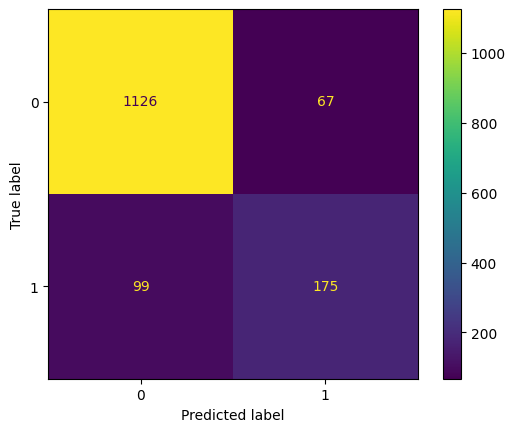

In [37]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()

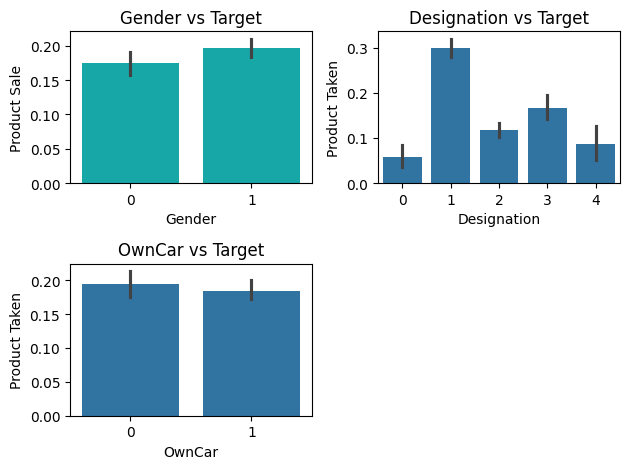

In [38]:
plt.Figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(x='Gender',y='Target',color='c',data=df)
plt.title("Gender vs Target")
plt.ylabel("Product Sale")

plt.subplot(2,2,2)
sns.barplot(x='Designation',y='Target',data=df)
plt.title("Designation vs Target")
plt.ylabel("Product Taken")
#plt.tight_layout()

plt.subplot(2,2,3)
sns.barplot(x='OwnCar',y='Target',data=df)
plt.title("OwnCar vs Target")
plt.ylabel("Product Taken")

plt.tight_layout()


In [39]:
df

,Passport,NumberOfTrips,CityTier,NumberOfFollowups,DurationOfPitch,Occupation,PreferredPropertyStar,OwnCar,Designation,TypeofContact,NumberOfPersonVisiting,ProductPitched,MaritalStatus,DeviceUsed,Gender,PitchSatisfactionScore,NumberOfChildrenVisiting,Target
0,1,1.0,2,3.0,6.0,2,3.0,1,2,1,3,1,2,1,0,2,0.0,1
1,0,2.0,0,4.0,14.0,2,4.0,1,2,0,3,1,0,0,1,3,2.0,0
2,1,7.0,0,4.0,8.0,0,3.0,0,1,1,3,0,2,0,1,3,0.0,1
3,1,2.0,0,3.0,9.0,2,3.0,1,1,0,2,0,0,0,0,5,1.0,0
4,0,1.0,0,3.0,8.0,3,4.0,1,1,1,2,0,0,0,1,5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,2.0,2,5.0,9.0,3,4.0,1,2,1,3,1,3,1,1,1,1.0,1
4884,1,3.0,0,5.0,31.0,2,3.0,1,1,0,4,0,2,0,1,3,2.0,1
4885,0,7.0,2,4.0,17.0,2,4.0,1,3,1,4,3,1,1,0,1,3.0,1
4886,0,3.0,2,4.0,16.0,3,3.0,0,1,1,3,0,2,1,1,5,2.0,1


In [40]:
x_res

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.33333333],
       [0.        , 0.23809524, 0.        , ..., 0.        , 1.        ,
        0.33333333],
       [1.        , 0.04761905, 0.        , ..., 1.        , 0.5       ,
        0.33333333],
       ...,
       [1.        , 0.06971738, 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [1.        , 0.0232617 , 0.        , ..., 0.        , 1.        ,
        0.16283188],
       [0.5981128 , 0.1615453 , 0.7009436 , ..., 1.        , 1.        ,
        0.66666667]], shape=(5550, 17))

In [41]:
print(model.predict([[0.9,0.3,1,0.5,0.1,0.1,0.5,0.8,0.1,1,0.10,0,0.5,0.4,0,0,1]]))

[1]


In [42]:
print(model.predict([[0,0,0,0.5,0.1,0.1,0.5,0,0.1,1,0.1,0,0,0.4,0,0,1]]))

[0]
